역행렬과 연립방정식

**정사각행렬(square matrix)**

열과 행 수가 같은 n*n(n은 정수) 행렬을 정사각행렬(square matrix)\
정사각행렬의 행과 열이 같은 (i,i)원소는 대각원소(diagonal element)
대학원소 이외에 다른 원소가 0인 행렬을 대각행렬

A * I_n = I_m * A = A

A * A^ = A^ * A = I

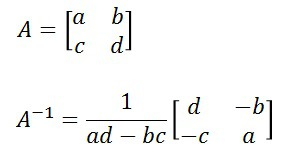



행렬식: ad - bc **detA**

선형종속(inear dependent)
선형독립(linear independent)

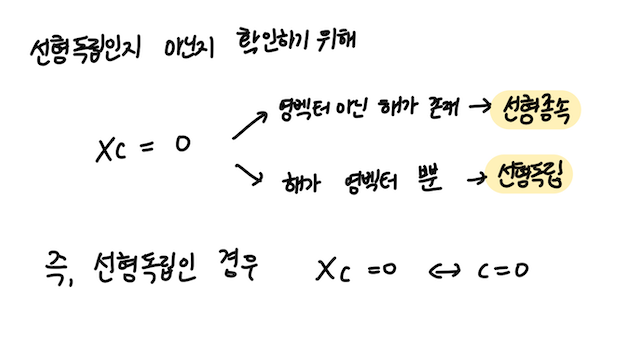

랭크(rank): 행렬을 변환한 결과가 0^t 와 일치하지 않는 행수를 해당 행렬의 랭크(rank) 라고 한다.

만약 단위 행렬이 되지 않으면 A는 비가역행렬이며, 0^t가 아닌 행수가 A의 랭크이다.


# **활성화 함수 계층 구하기**

Relu

In [ ]:
class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

x = np.array([[1.0, -0.5],[-2.0,3.0]])
print(x)

mask = (x <= 0)

print(mask)

Sigmoid

In [2]:
class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self,x):
    out = 1 / 1(1 + np.exp(-x))
    self.out = out

    return out

  def backward(self, dout):
    dx = dout * (1.0- self.out) * self.out

    return dx

<>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-2-838d7afe80a2>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  out = 1 / 1(1 + np.exp(-x))


In [ ]:
import numpy as np

class Affine:
  def __init__(self, W, b):
    self.W =W
    self.b =b
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b

    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.det(self.x.T, dout)
    self.db = np.sum(dout, asix=0)

    return dx

SoftmaxWithLoss

소프트맥스와 교차 엔트로피


In [ ]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None

  def forawrd(self, x, t):
    self.t =t
    self.y = softmax(x)
    self.loss= cross_entropy_error(self.y, self.t)
    return self.losss

  def backward(self, dout = 1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t)/batch_size

    return dx
